In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dabest
import numpy as np


In [68]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

In [69]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [67]:
data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/'
df = pd.read_csv(data_path+'wholeTrial_measures.csv')
df_day1 = df[df['day']=='D1']

df_day1.pathL = df_day1.pathL/1000
#flatui = ["#7f8c8d","#f39c12"] #color schedule for Tg and Wt, respectively.
# sns.set(style='ticks', font_scale=2)

D:\ryanh\Anaconda3\envs\TgF344-AD_Open_Field\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [54]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'

#### Fig 1 General Locomotion


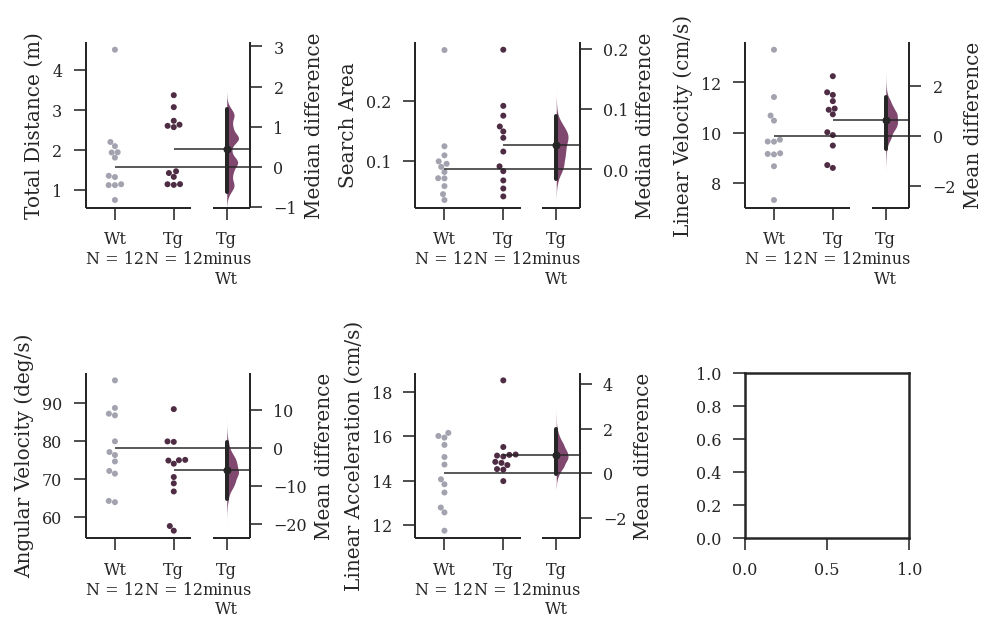

In [55]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=1)
axs = axs.ravel()

pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="pathL")
flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.
ax = pathL_df.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Total Distance (m)")


pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="searchArea")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Search Area")


pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="runSpeed")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.mean_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Linear Velocity (cm/s)")


pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="runAngVel")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.mean_diff.plot(ax=axs[3],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[3].set_ylabel("Angular Velocity (deg/s)")


pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="runAcell")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.mean_diff.plot(ax=axs[4],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[4].set_ylabel("Linear Acceleration (cm/s)")


plt.savefig(fig_save_path+'Distance.svg',dpi=900,bbox_inches='tight')
plt.savefig(fig_save_path+'Distance.png',dpi=900,bbox_inches='tight')


### Fig 2 Running Segment Features

In [62]:
df_seg = pd.read_csv(data_path+"segment_measures.csv")
df_day1_seg = df_seg[df_seg['day']=='D1']

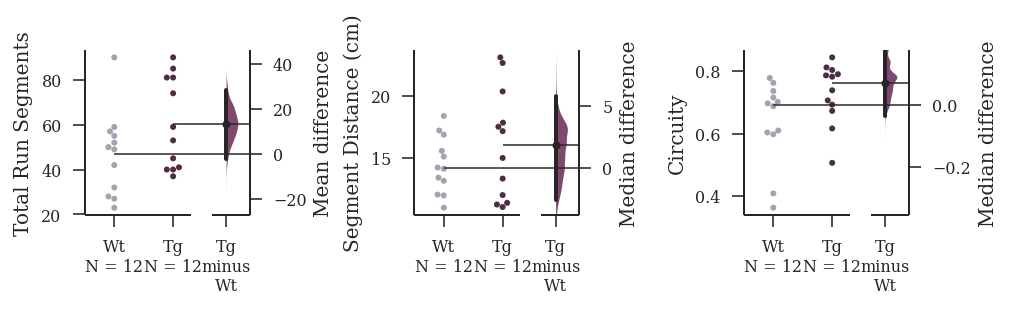

In [56]:
fig, axs = plt.subplots(1,3, figsize=set_size('thesis', fraction=1.25, subplots=(1, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=1)
axs = axs.ravel()

#flatui = ["#7f8c8d","#f39c12"] #color schedule for Tg and Wt, respectively.
# sns.set(style='ticks', font_scale=2)

pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="numRuns")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.mean_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Total Run Segments")


pathL_df = dabest.load(df_day1_seg, idx=("Wt","Tg"),x="group", y="seg_dist")
flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.
ax = pathL_df.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Segment Distance (cm)")

pathL_df = dabest.load(df_day1_seg, idx=("Wt","Tg"),x="group", y="seg_circ")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.median_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Circuity")

plt.savefig(fig_save_path+'segments.svg',dpi=900,bbox_inches='tight')


### Figure 3 Stops

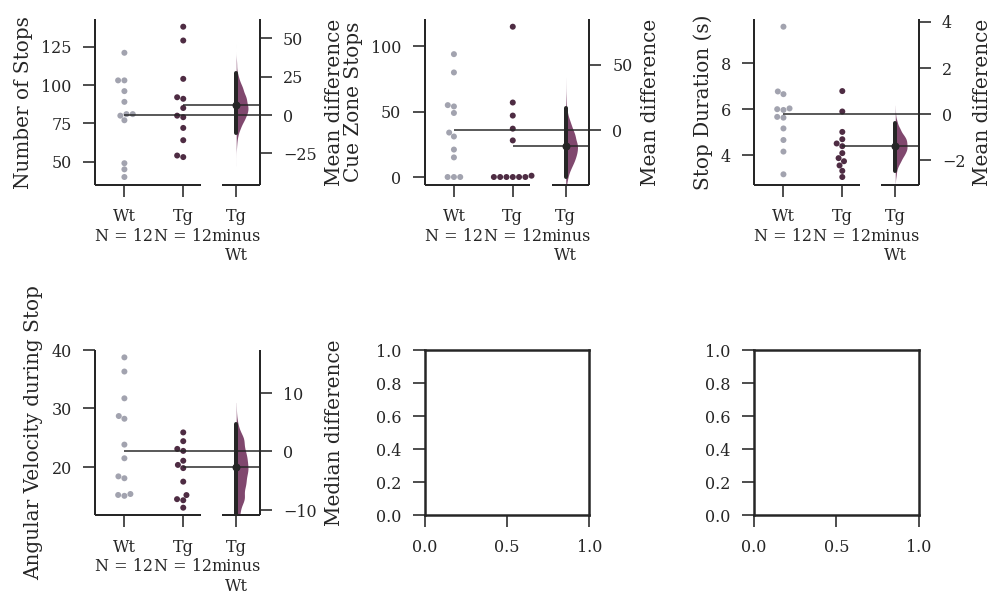

In [70]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=1)
axs = axs.ravel()

pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="numStops")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.mean_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Number of Stops")

pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="CueStops")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.mean_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Cue Zone Stops")

pathL_df = dabest.load(df_day1_seg, idx=("Wt","Tg"),x="group", y="stop_dur")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.mean_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Stop Duration (s)")

pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="stopAngVel")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.median_diff.plot(ax=axs[3],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[3].set_ylabel("Angular Velocity during Stop")

# pathL_df = dabest.load(df, idx=("Wt","Tg"),x="group", y="cue_dwell_diff")
# flatui = ["#601a4a","#9c9eb5"]   
# ax = pathL_df.mean_diff.plot(ax=axs[4],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
# axs[4].set_ylabel("Cue Dwell Time (s)")

plt.savefig(fig_save_path+'stops.svg',dpi=900,bbox_inches='tight')


### Figure 4 

In [72]:
# Loading data
df = pd.read_csv(data_path+"hbData.csv")
# grab day 1
df_day1 = df[df['day']=='D1']

D:\ryanh\Anaconda3\envs\TgF344-AD_Open_Field\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


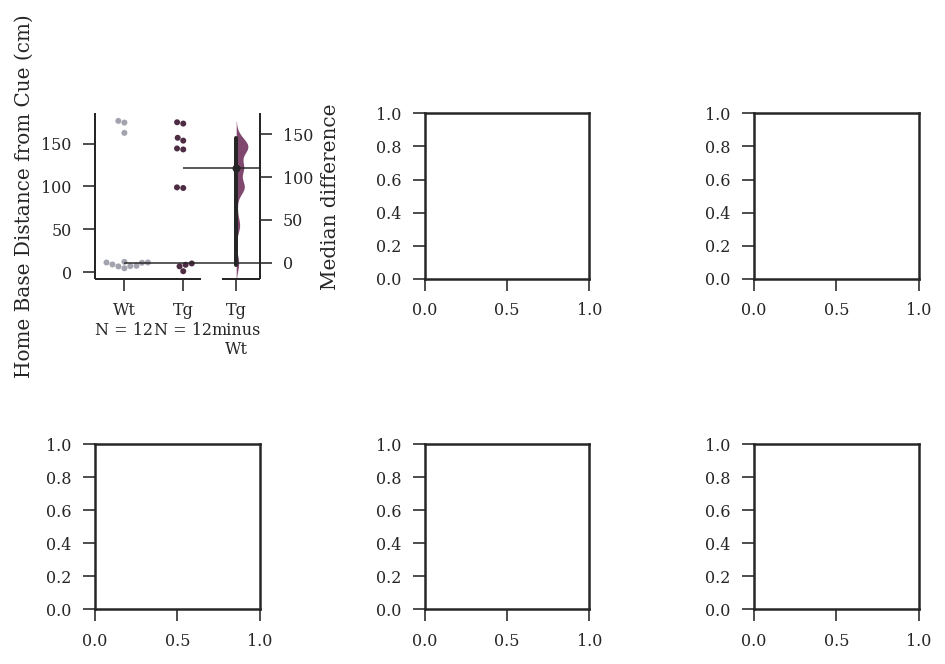

In [78]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=1)
axs = axs.ravel()

pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="Distance2Cue")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Home Base Distance from Cue (cm)")

plt.savefig(fig_save_path+'Distance2Cue.svg',dpi=900,bbox_inches='tight')


### Figure 5 

D:\ryanh\Anaconda3\envs\TgF344-AD_Open_Field\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\ryanh\Anaconda3\envs\TgF344-AD_Open_Field\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\ryanh\Anaconda3\envs\TgF344-AD_Open_Field\lib\site-packages\dabest\_classes.py:751: UserWarning: There are 328 bootstrap(s) that are not defined. This is likely due to smaple sample sizes. The values in a bootstrap for a group will be more likely to be all equal, with a resulting variance of zero. The computation of Cohen's d and Hedges' g thus involved a division by zero. 
  warnings.warn(warn_ms

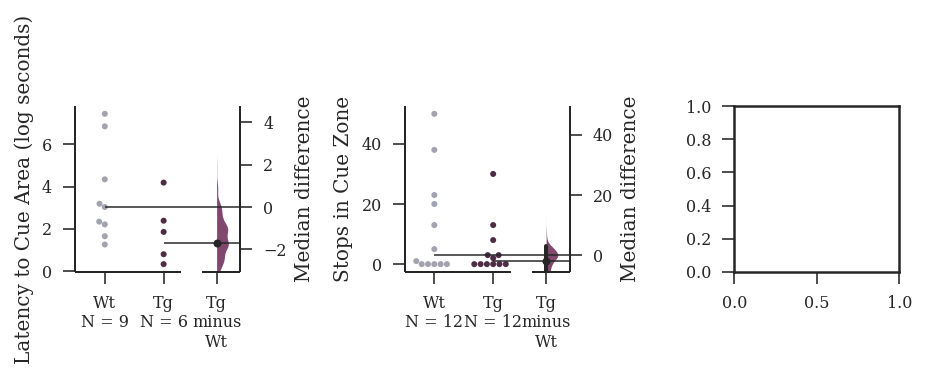

In [82]:
df = pd.read_csv(data_path+"cueData.csv")
df_day2 = df[df['day']=='D2']

fig, axs = plt.subplots(1,3, figsize=set_size('thesis', fraction=1.25, subplots=(1, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=1)
axs = axs.ravel()


df_day2.time2cue = np.log(df_day2.time2cue)

pathL_df = dabest.load(df_day2, idx=("Wt","Tg"),x="group", y="time2cue")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Latency to Cue Area (log seconds)")
# plt.savefig("d:\\Users\\BClarkLab\\Google Drive (lberkowitz@unm.edu)\\Manuscripts\\In Progress\\TgF344-AD_OF\\Figures\\Time2Cue.svg", format="svg")


df = pd.read_csv(data_path+"wholeTrial_measures.csv")
df_day2 = df[df['day']=='D2']


pathL_df = dabest.load(df_day2, idx=("Wt","Tg"),x="group", y="CueStops")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Stops in Cue Zone")
# plt.savefig("d:\\Users\\BClarkLab\\Google Drive (lberkowitz@unm.edu)\\Manuscripts\\In Progress\\TgF344-AD_OF\\Figures\\CueStops_d2.svg", format="svg")

plt.savefig(fig_save_path+'cue_time_stops.svg',dpi=900,bbox_inches='tight')


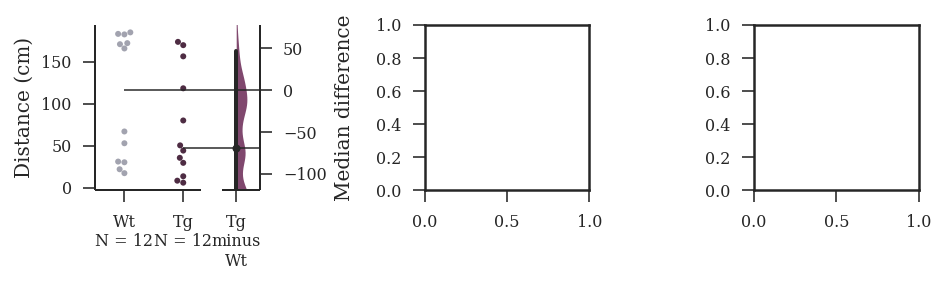

In [83]:
df = pd.read_csv(data_path+"HBdist.csv")

fig, axs = plt.subplots(1,3, figsize=set_size('thesis', fraction=1.25, subplots=(1, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=1)
axs = axs.ravel()

pathL_df = dabest.load(df, idx=("Wt","Tg"),x="group", y="primaryHBdist")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Distance (cm)")
# plt.savefig("d:\\Users\\BClarkLab\\Google Drive (lberkowitz@unm.edu)\\Manuscripts\\In Progress\\TgF344-AD_OF\\Figures\\primaryHBdist.svg", format="svg")

plt.savefig(fig_save_path+'primaryHBdist.svg',dpi=900,bbox_inches='tight')
